## Star Classifier Predictor

This jupyter notebook was create to explore an test classifier reviews.

#### Install the necessaries packages

### About Dataset

In [1]:
import opendatasets as od
import pandas as pd
import os

For the dataset:

In [2]:
od.download("https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce","../src/data/raw")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


In [3]:
os.remove("../src/data/raw/brazilian-ecommerce/olist_customers_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_geolocation_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_order_items_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_order_payments_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_orders_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_products_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/product_category_name_translation.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_sellers_dataset.csv")


The final file is below. Now, just read that with pandas

In [4]:
olist_dataset = pd.read_csv("../src/data/raw/brazilian-ecommerce/olist_order_reviews_dataset.csv")

### Fixing the Dataset

#### Overview

To understand and work with the dataset, first need to understand and explore how it is described. Below, they are be resume some informations about columns of dataset.

In [5]:
olist_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


To use in project, we just need the 3 columns: __review_score__, __review_comment_title__ and __review_comment_message__. 
The dataset contain some blank spaces in somes spaces on this columns. This case can be view in cell below.

In [6]:
olist_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### Organizer the dataset

To use the dataset in the project, I need to prepare the dataset by eliminating the columns that I don’t use for analysis and model creation. Additionally, I will remove duplicate rows and invalid inputs when necessary.

In [7]:
olist_dataset = olist_dataset[['review_score', 'review_comment_title', 'review_comment_message']]
olist_dataset.head(20)

,review_score,review_comment_title,review_comment_message
0,4,NaN,NaN
1,5,NaN,NaN
2,5,NaN,NaN
3,5,NaN,Recebi bem antes do prazo estipulado.
4,5,NaN,Parabéns lojas lannister adorei comprar pela I...
5,1,NaN,NaN
6,5,NaN,NaN
7,5,NaN,NaN
8,5,NaN,NaN
9,4,recomendo,aparelho eficiente. no site a marca do aparelh...


The, removing rows when the two columns ('review_comment_title' and 'review_comment_message') be nulls at the same time.

In [8]:
olist_dataset = olist_dataset.dropna(subset=['review_comment_title', 'review_comment_message'], how='all').reset_index(drop=True)


In [9]:
olist_dataset.head(20)

,review_score,review_comment_title,review_comment_message
0,5,NaN,Recebi bem antes do prazo estipulado.
1,5,NaN,Parabéns lojas lannister adorei comprar pela I...
2,4,recomendo,aparelho eficiente. no site a marca do aparelh...
3,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes..."
5,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E..."
6,1,Não chegou meu produto,Péssimo
7,5,Ótimo,Loja nota 10
8,5,NaN,obrigado pela atençao amim dispensada
9,5,NaN,A compra foi realizada facilmente.\r\nA entreg...


In [10]:
olist_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42706 entries, 0 to 42705
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_score            42706 non-null  int64 
 1   review_comment_title    11568 non-null  object
 2   review_comment_message  40977 non-null  object
dtypes: int64(1), object(2)
memory usage: 1001.1+ KB


In [11]:
# Define invalids entries on dataset
invalid_placeholders = ["NULL", "N/A", "NONE", "???"]

# Mask for review_comment_title
cond_title = (
    olist_dataset['review_comment_title'].isna() | 
    (olist_dataset['review_comment_title'].str.strip() == '') |
    (olist_dataset['review_comment_title'].str.strip().isin(invalid_placeholders))
)

# Mask for review_comment_message
cond_message = (
    olist_dataset['review_comment_message'].isna() | 
    (olist_dataset['review_comment_message'].str.strip() == '') |
    (olist_dataset['review_comment_message'].str.strip().isin(invalid_placeholders))
)

# Combine masks with & to remove rows with the two masks at the same time
invalid_mask = cond_title & cond_message

# Filter invalids rows
invalid_rows = olist_dataset[invalid_mask]

In [12]:
print(f"There are {len(invalid_rows)} on the dataset")
invalid_rows.head(21)


There are 20 on the dataset


,review_score,review_comment_title,review_comment_message
4362,5,NaN,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n
5125,5,NaN,\r\n\r\n
5165,5,NaN,\r\n
11355,5,NaN,\r\n
11759,4,NaN,
15887,4,NaN,
17079,5,NaN,\r\n
17710,5,NaN,
19487,5,NaN,
20984,1,NaN,???


In [13]:
olist_dataset_reviews = olist_dataset[~invalid_mask].reset_index(drop=True)


The final dataset (__olist_dataset_reviews__) contains 3 columns with data that I can use for analysis. The rows contain reviews in the form of star ratings and include at least one data column. This specification will be used to build the model with as much data as possible.

### Exporing the dataset

Exploring the dataset about star reviews numbers.

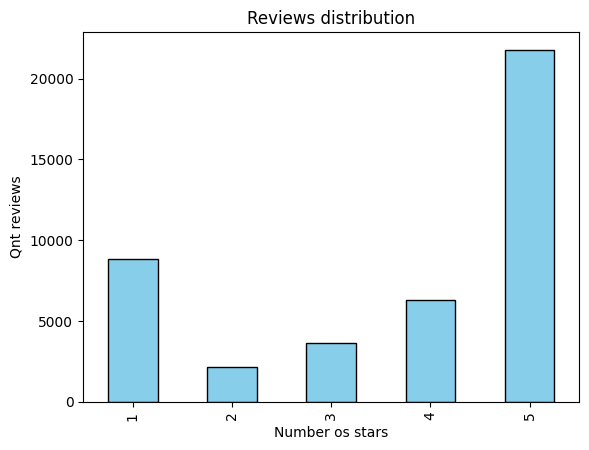

In [14]:
import matplotlib.pyplot as plt

olist_dataset_reviews['review_score'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Number os stars')
plt.ylabel('Qnt reviews')
plt.title('Reviews distribution')
plt.show()


The figure shows how unbalanced the dataset is in terms of the distribution of available reviews. The number of 5-star reviews is higher than the number of other star ratings. The number of 1-star reviews, in second place, shows how people generally review the dataset, mostly in two ways: when they like the product/service or when they have a bad experience.

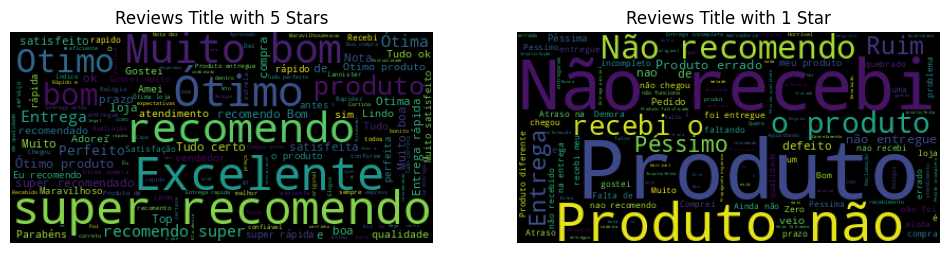

In [15]:
from wordcloud import WordCloud

positive_title = " ".join(olist_dataset_reviews[olist_dataset_reviews['review_score'] == 5]['review_comment_title'].fillna(""))
negative_title = " ".join(olist_dataset_reviews[olist_dataset_reviews['review_score'] == 1]['review_comment_title'].fillna(""))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(WordCloud(background_color='black').generate(positive_title))
ax[0].set_title("Reviews Title with 5 Stars")
ax[0].axis('off')

ax[1].imshow(WordCloud(background_color='black').generate(negative_title))
ax[1].set_title("Reviews Title with 1 Star")
ax[1].axis('off')

plt.show()


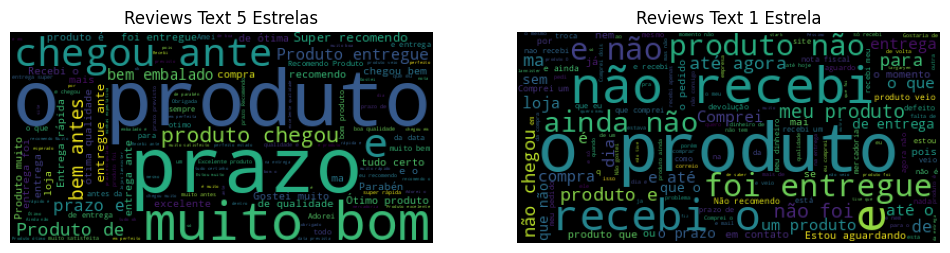

In [16]:
positive_text = " ".join(olist_dataset_reviews[olist_dataset_reviews['review_score'] == 5]['review_comment_message'].fillna(""))
negative_text = " ".join(olist_dataset_reviews[olist_dataset_reviews['review_score'] == 1]['review_comment_message'].fillna(""))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(WordCloud(background_color='black').generate(positive_text))
ax[0].set_title("Reviews Text 5 Estrelas")
ax[0].axis('off')

ax[1].imshow(WordCloud(background_color='black').generate(negative_text))
ax[1].set_title("Reviews Text 1 Estrela")
ax[1].axis('off')

plt.show()

The word distribution varies significantly between different star ratings. There are words that are commonly associated with each type of review, whether it is a 5-star or a 1-star rating. In positive reviews (5 stars), words expressing satisfaction, such as "muito bom" "excelente" and "ótimo" frequently appear. On the other hand, in negative reviews (1 star), words indicating dissatisfaction, such as "não recebi" and "não péssimo" are more frequent.

However, some words appear in both cases but do not necessarily indicate sentiment on their own. A good example is the word "Recomendo" In some 5-star reviews, users say they recommend the product, while in 1-star reviews, they explicitly state that they do not recommend it. Without proper context, these words could lead to misinterpretations in sentiment analysis.

To address this, in my project, I plan to merge the title and review text into a single string. This will help better link words to their meanings by preserving their context, ensuring a more accurate sentiment analysis and text processing.

### Create the function to prepare the strings

In [17]:
import emoji

# Remove emojis from strings
def remove_emojis(inputString: str) -> str:
    listCaracteres = [char for char in inputString if not emoji.is_emoji(char)] # Analyzer string and remove emojis.
    return "".join(listCaracteres)

In [18]:
sentencesList = [
    "Good morning! ☀️😊",
    "Let's go! 🚀🔥",
    "This is amazing! 😍✨",
    "I'm hungry! 🍕😋",
    "Coffee time ☕😁",
    "Congratulations! 🎉🎂",
    "The rain is heavy ☔🌧️",
    "Good night! 🌙💤",
    "See you later! 👋😊",
    "That was funny! 😂🤣"
]

for sentence in sentencesList:
    print(f"The sentence: \"{sentence}\" now is \"{remove_emojis(sentence)}\"")

The sentence: "Good morning! ☀️😊" now is "Good morning! ️"
The sentence: "Let's go! 🚀🔥" now is "Let's go! "
The sentence: "This is amazing! 😍✨" now is "This is amazing! "
The sentence: "I'm hungry! 🍕😋" now is "I'm hungry! "
The sentence: "Coffee time ☕😁" now is "Coffee time "
The sentence: "Congratulations! 🎉🎂" now is "Congratulations! "
The sentence: "The rain is heavy ☔🌧️" now is "The rain is heavy ️"
The sentence: "Good night! 🌙💤" now is "Good night! "
The sentence: "See you later! 👋😊" now is "See you later! "
The sentence: "That was funny! 😂🤣" now is "That was funny! "


In [19]:
import re

# Removes non-alphabetic characters, preserving Portuguese-specific characters (accents, ç, etc.).
def remove_punctuation(inputString: str) -> str:
    #listCaracteres = [char for char in inputString if char.isalpha() or char.isspace()]
    return re.sub(r'[^a-zA-ZáéíóúâêîôûãõçÁÉÍÓÚÂÊÎÔÛÃÕ ]', '', inputString)
    #return "".join(listCaracteres)

In [20]:
phrases = [
    "Hello, world! How are you today?",  
    "Wait... What?! Are you serious?!",  
    "Python is awesome, isn't it?",  
    "Oh no!!! I forgot my keys... again.",  
    "Hey @John, did you see this? #amazing",  
    "She said: 'I'll be there at 5:00 PM!'",  
    "Caution: slippery floor - be careful!",  
    "Wow... just wow. Unbelievable!",  
    "Email me at example@email.com.",  
    "Do you prefer coffee, tea, or juice?"
]

for sentence in phrases:
    print(f"The phrase now is: {remove_punctuation(sentence)}")

The phrase now is: Hello world How are you today
The phrase now is: Wait What Are you serious
The phrase now is: Python is awesome isnt it
The phrase now is: Oh no I forgot my keys again
The phrase now is: Hey John did you see this amazing
The phrase now is: She said Ill be there at  PM
The phrase now is: Caution slippery floor  be careful
The phrase now is: Wow just wow Unbelievable
The phrase now is: Email me at exampleemailcom
The phrase now is: Do you prefer coffee tea or juice


In [21]:
import re

# Removes escape characters such as tabs, newlines, carriage returns, form feeds, and vertical tabs from the input string. 
def remove_special_chars(input_string: str) -> str:
    return re.sub(r'[\t\n\r\f\v]', ' ', input_string)  # Remove escape characters

In [22]:
test_phrases = [
    "Hello\tWorld!",      # Tab
    "This is a test\nNew line here.",  # Newline
    "Carriage return\rTest.",  # Carriage return
    "Form feed\fTest.",  # Form feed
    "Vertical tab\vTest.",  # Vertical tab
    "Mixing \t multiple \n escape \r characters \f in \v one sentence!",  # Combination of all
    "\tLeading tab and new line\n",  # Leading tab and newline
    "Ending with escape chars.\r\f\v",  # Ending with different escape chars
    "\n\nDouble newlines before text!",  # Multiple newlines
    "Spaces are fine, but escape\tcharacters\nshould be removed!\r"  # Mixed with spaces
]

for phrase in test_phrases:
    cleaned_phrase = remove_special_chars(phrase)
    print(f"THe phrase now is: {remove_special_chars(phrase)}")

THe phrase now is: Hello World!
THe phrase now is: This is a test New line here.
THe phrase now is: Carriage return Test.
THe phrase now is: Form feed Test.
THe phrase now is: Vertical tab Test.
THe phrase now is: Mixing   multiple   escape   characters   in   one sentence!
THe phrase now is:  Leading tab and new line 
THe phrase now is: Ending with escape chars.   
THe phrase now is:   Double newlines before text!
THe phrase now is: Spaces are fine, but escape characters should be removed! 


Now, testing the three functions with examples in portuguese BR.

In [ ]:
test_phrases = [
    "Olá, você está bem? 😊",
    "E-mail: exemplo@email.com 📧",
    "Você viu isso? 🤔",
    "Python é maravilhoso!!! 🚀🔥",
    "Preço: R$9,99 💲",
    "Cálculos: 5 + 5 = 10 ➕",
    "Digite @usuário para mencionar alguém!",
    "Hashtags são legais: #Python #InteligênciaArtificial",
    "Atenção: Piso escorregadio ⚠️🚷",
    "Caminho no Windows: C:\\Usuários\\Admin",
    "Remover quebras de linha\n com o código\r corretamente!",
    "Tabulação\tseparada\tpor\tTabs.",
    "Tabulação vertical\vtestando.",
    "Exemplo de feed de formulário\f!",
    "100% real! ✔️",
    "Temperatura de -10°C 🥶",
    "Marca registrada™ e copyright© são símbolos.",
    "Caráteres especiais: ß, é, ñ, ç.",
    "Símbolos de moeda: € ¥ £ ₹ ₿",
    "Frase misturada 🚀 @usuario #AI 100% ✔️ Python\nquebra de linha!",
    "Texto com tabulação\t e espaço no final.   ",
    "Caracteres inválidos: ☺☹♠♦♣♤",
    "Vamos aprender português! 💬👩‍🏫",
    "Texto com símbolos estranhos: ¡¿",
    "Texto com caracteres inválidos: 𐍈𐍉𐍊"
]

new_list = []

for phrase in test_phrases:
    preparedString = remove_emojis(phrase)
    preparedString = remove_punctuation(preparedString)
    preparedString = remove_special_chars(preparedString)
    new_list.append(" ".join(preparedString.split(" ")))

for new_string in new_list:
    print(f"Now, the final phrase is: {new_string}")

Now, the final phrase is: Olá você está bem 
Now, the final phrase is: Email exemploemailcom 
Now, the final phrase is: Você viu isso 
Now, the final phrase is: Python é maravilhoso 
Now, the final phrase is: Preço R 
Now, the final phrase is: Cálculos      
Now, the final phrase is: Digite usuário para mencionar alguém
Now, the final phrase is: Hashtags são legais Python InteligênciaArtificial
Now, the final phrase is: Atenção Piso escorregadio 
Now, the final phrase is: Caminho no Windows CUsuáriosAdmin
Now, the final phrase is: Remover quebras de linha com o código corretamente
Now, the final phrase is: TabulaçãoseparadaporTabs
Now, the final phrase is: Tabulação verticaltestando
Now, the final phrase is: Exemplo de feed de formulário
Now, the final phrase is:  real 
Now, the final phrase is: Temperatura de C 
Now, the final phrase is: Marca registrada e copyright são símbolos
Now, the final phrase is: Caráteres especiais  é  ç
Now, the final phrase is: Símbolos de moeda     
Now, t

In [ ]:
import re

def remove_space_unecessary(inputString: str) -> str:
    """Removes unnecessary spaces from a string

    Args:
        input_string (str): Phrase with space unecessary to remove.

    Returns:
        str: String without space unecessary.
    """
    # Remove leading and trailing spaces
    input_string = inputString.strip()

    # Replace multiple spaces with a single space
    input_string = re.sub(r'\s+', ' ', input_string)

    # Remove spaces before punctuation
    input_string = re.sub(r'\s([?.!,:;])', r'\1', input_string)

    return input_string

In [25]:
test_phrases = [
    "   Olá,    como   você   está?    ",
    "   O   Python    é incrível!   ",
    "    Vamos   aprender   Python  hoje.   ",
    "Olá   mundo!   Como  você   está   ?   ",
    "     Exemplo   de  texto   com   espaços   extras.   ",
    "Este   é   um  exemplo de   string com   espaçamentos   desnecessários.   ",
    "   Você   pode   ver   isso?  ",
    "   Testando   espaços  desnecessários...  ",
    "Aqui  temos   uma  frase com   múltiplos    espaços.    ",
    "Espaços    extras   em  todos   os   lugares!   ",
    "   O  que  você  acha  disso?   ",
    "   Como  você   está   hoje?   Vamos aprender   mais!   ",
    "Testando   a função de   remoção   de   espaços.   ",
    "Essa  frase tem   espaços  extras   para    testar.   ",
    "   Vamos    ver se   a   função   remove   todos    esses   espaços.   ",
    "Aqui   vai   mais   um  exemplo.   Teste    completo.   ",
    "Esse   texto   tem   espaços  e   pontuação  no   final.   ",
    "   Como   remover   os   espaços   extras   em uma   string?   ",
    "   Eu   vou   testar   este   caso !   ",
    "   Estamos   quase   acabando   aqui...   ",
    "Será   que   funciona   para   todos   os   casos    ?   ",
]

for phrase in test_phrases:
    print(f"The phrase now is: {remove_space_unecessary(phrase)}")

The phrase now is: Olá, como você está?
The phrase now is: O Python é incrível!
The phrase now is: Vamos aprender Python hoje.
The phrase now is: Olá mundo! Como você está?
The phrase now is: Exemplo de texto com espaços extras.
The phrase now is: Este é um exemplo de string com espaçamentos desnecessários.
The phrase now is: Você pode ver isso?
The phrase now is: Testando espaços desnecessários...
The phrase now is: Aqui temos uma frase com múltiplos espaços.
The phrase now is: Espaços extras em todos os lugares!
The phrase now is: O que você acha disso?
The phrase now is: Como você está hoje? Vamos aprender mais!
The phrase now is: Testando a função de remoção de espaços.
The phrase now is: Essa frase tem espaços extras para testar.
The phrase now is: Vamos ver se a função remove todos esses espaços.
The phrase now is: Aqui vai mais um exemplo. Teste completo.
The phrase now is: Esse texto tem espaços e pontuação no final.
The phrase now is: Como remover os espaços extras em uma stri

### Create and prepare Model

Now, with the tools ready, I will apply them for model creation and evaluation.

#### Preparing the dataset

I could perform some kind of classification involving the three columns (stars, title, description). However, for this approach, I will merge the title and description columns since I am only analyzing the words that make up the user's review. In this sense, I will apply a function to combine the two columns and create a third one. Once merged, I will apply the tools to remove unnecessary characters and symbols.

In [26]:
olist_dataset_reviews['reviews_merge'] = olist_dataset_reviews[['review_comment_title', 'review_comment_message']].apply(lambda x: ' '.join(x.dropna()), axis=1)

Now, this dataset will be:

In [27]:
olist_dataset_reviews.head(20)

,review_score,review_comment_title,review_comment_message,reviews_merge
0,5,NaN,Recebi bem antes do prazo estipulado.,Recebi bem antes do prazo estipulado.
1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,Parabéns lojas lannister adorei comprar pela I...
2,4,recomendo,aparelho eficiente. no site a marca do aparelh...,recomendo aparelho eficiente. no site a marca ...
3,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...","Super recomendo Vendedor confiável, produto ok..."
5,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...","GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E..."
6,1,Não chegou meu produto,Péssimo,Não chegou meu produto Péssimo
7,5,Ótimo,Loja nota 10,Ótimo Loja nota 10
8,5,NaN,obrigado pela atençao amim dispensada,obrigado pela atençao amim dispensada
9,5,NaN,A compra foi realizada facilmente.\r\nA entreg...,A compra foi realizada facilmente.\r\nA entreg...


Now, I will apply data cleaning using the functions I previously created.

In [28]:
# Strings to lowcase
olist_dataset_reviews['reviews_merge'] = olist_dataset_reviews['reviews_merge'].apply(lambda x: str(x).lower())
olist_dataset_reviews.head(10)

,review_score,review_comment_title,review_comment_message,reviews_merge
0,5,NaN,Recebi bem antes do prazo estipulado.,recebi bem antes do prazo estipulado.
1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar pela i...
2,4,recomendo,aparelho eficiente. no site a marca do aparelh...,recomendo aparelho eficiente. no site a marca ...
3,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","mas um pouco ,travando...pelo valor ta boa.\r\n"
4,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...","super recomendo vendedor confiável, produto ok..."
5,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...","gostaria de saber o que houve, sempre recebi e..."
6,1,Não chegou meu produto,Péssimo,não chegou meu produto péssimo
7,5,Ótimo,Loja nota 10,ótimo loja nota 10
8,5,NaN,obrigado pela atençao amim dispensada,obrigado pela atençao amim dispensada
9,5,NaN,A compra foi realizada facilmente.\r\nA entreg...,a compra foi realizada facilmente.\r\na entreg...


In [29]:
olist_dataset_reviews['reviews_merge'] = olist_dataset_reviews['reviews_merge'].fillna('').apply(remove_emojis)
olist_dataset_reviews['reviews_merge'] = olist_dataset_reviews['reviews_merge'].fillna('').apply(remove_punctuation)
olist_dataset_reviews['reviews_merge'] = olist_dataset_reviews['reviews_merge'].fillna('').apply(remove_special_chars)
olist_dataset_reviews['reviews_merge'] = olist_dataset_reviews['reviews_merge'].fillna('').apply(remove_space_unecessary)

In [31]:
olist_dataset_reviews.head(20)

,review_score,review_comment_title,review_comment_message,reviews_merge
0,5,NaN,Recebi bem antes do prazo estipulado.,recebi bem antes do prazo estipulado
1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar pela i...
2,4,recomendo,aparelho eficiente. no site a marca do aparelh...,recomendo aparelho eficiente no site a marca d...
3,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",mas um pouco travandopelo valor ta boa
4,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",super recomendo vendedor confiável produto ok ...
5,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",gostaria de saber o que houve sempre recebi e ...
6,1,Não chegou meu produto,Péssimo,não chegou meu produto péssimo
7,5,Ótimo,Loja nota 10,ótimo loja nota
8,5,NaN,obrigado pela atençao amim dispensada,obrigado pela atençao amim dispensada
9,5,NaN,A compra foi realizada facilmente.\r\nA entreg...,a compra foi realizada facilmentea entrega foi...


In [ ]:
print(olist_dataset_reviews['reviews_merge'].isna().sum())


0


In [41]:
if((olist_dataset_reviews['reviews_merge'].str.strip() == '').sum() != 0):
    olist_dataset_reviews = olist_dataset_reviews[olist_dataset_reviews['reviews_merge'].str.strip() != '']

print((olist_dataset_reviews['reviews_merge'].str.strip() == '').sum())  


0


In [42]:
print(olist_dataset_reviews['reviews_merge'].apply(lambda x: isinstance(x, str)).value_counts())


reviews_merge
True    42454
Name: count, dtype: int64


In [43]:
print(olist_dataset_reviews[olist_dataset_reviews['reviews_merge'].apply(lambda x: not isinstance(x, str))])


Empty DataFrame
Columns: [review_score, review_comment_title, review_comment_message, reviews_merge]
Index: []


In [44]:
olist_dataset_reviews.head(30)

,review_score,review_comment_title,review_comment_message,reviews_merge
0,5,NaN,Recebi bem antes do prazo estipulado.,recebi bem antes do prazo estipulado
1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar pela i...
2,4,recomendo,aparelho eficiente. no site a marca do aparelh...,recomendo aparelho eficiente no site a marca d...
3,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",mas um pouco travandopelo valor ta boa
4,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",super recomendo vendedor confiável produto ok ...
5,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",gostaria de saber o que houve sempre recebi e ...
6,1,Não chegou meu produto,Péssimo,não chegou meu produto péssimo
7,5,Ótimo,Loja nota 10,ótimo loja nota
8,5,NaN,obrigado pela atençao amim dispensada,obrigado pela atençao amim dispensada
9,5,NaN,A compra foi realizada facilmente.\r\nA entreg...,a compra foi realizada facilmentea entrega foi...
